In [250]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [251]:
df = pd.read_csv('/home/omo/Desktop/Data Science/Recess/Geoff/titanic_train.csv')

In [252]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

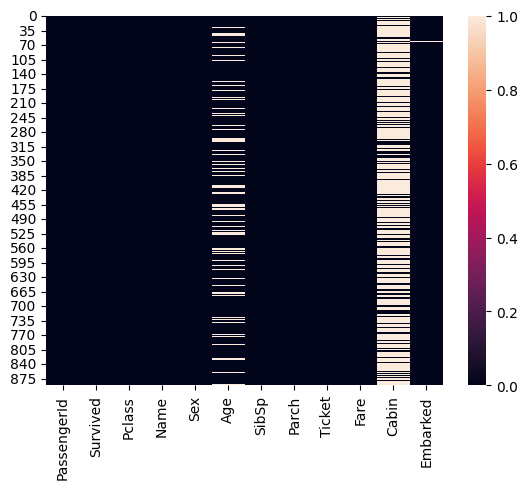

In [253]:
sns.heatmap(df.isnull()) # checking the missing values

In [254]:
df = df.drop('Cabin',axis=1) # dropping the Cabin column with a lot of missing values

In [255]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Pclass', ylabel='Age'>

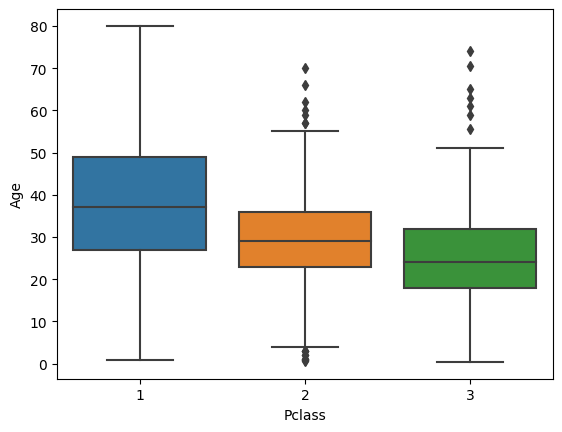

In [256]:
# Visualization using box plot 

sns.boxplot(x='Pclass',y='Age',data=df)

In [257]:
#Creating a function that fills the missing Age by the mean of ages of Pclass passengers
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [258]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1) # Applying the function on the columns along axis =1

<Axes: >

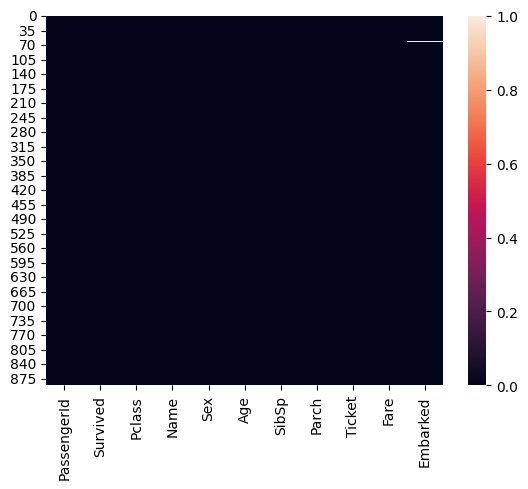

In [259]:
sns.heatmap(df.isnull()) # checking the missing values again

In [260]:
# dropping the remaining missing values in the dataframe
df=df.dropna()

<Axes: >

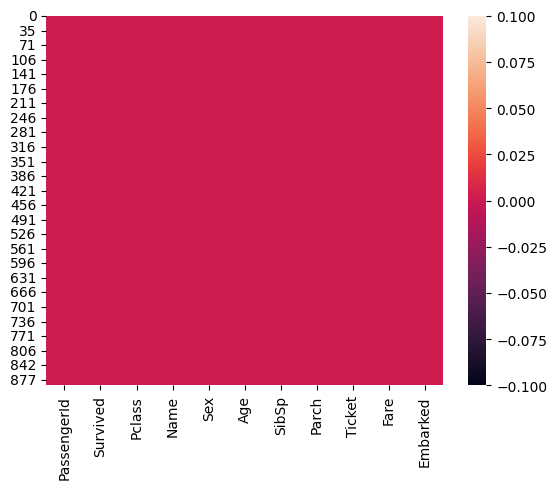

In [261]:
sns.heatmap(df.isnull()) # checking the missing values again and it is clean now

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [263]:
df.dtypes # we have some categorical features in our dataframe we have to encode them

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [264]:
# Exploring the categorical features
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

In [265]:
# Dropping the Name column

df = df.drop('Name',axis=1)

In [266]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [267]:
df = df.drop('Ticket',axis=1)

In [268]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


##### OneHot Encoding and dummies Variables using pandas

In [269]:
df1 = pd.read_csv('/home/omo/Desktop/MachineLearning/machinelearning/LogisticRegressionDatasets/titanic_train.csv')

In [270]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
# dropping the unnecessary columns
df1 = df1.drop(['Name','Cabin','Ticket'],axis=1)
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [272]:
dummies_Sex = pd.get_dummies(df1.Sex).astype(int)
dummies_Emarked = pd.get_dummies(df1.Embarked).astype(int)
dummies_Emarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [273]:
dummies_Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [274]:
df1  = pd.concat([df1,dummies_Sex,dummies_Emarked],axis=1)

In [275]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [276]:
df1 = df1.drop(['Sex','Embarked'],axis=1)

In [277]:
df1.head() # The dataframe is onehotencoded now

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [278]:
# To avoid dummy variables trap we have to drop n-1 of the dummy variables
df1 = df1.drop(['female','C'],axis=1)

In [279]:
df1 # this is now ready for machine learning

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


##### OneHot Encoding and dummies Variables using sklearn

In [280]:
# Original dataframe 
# Note: We only apply the onehot encoding on object variables
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [281]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['Sex','Embarked']]).toarray()
feature_array

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [282]:
ohe.categories_  # these are the categories in our onehotencoding

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [283]:
feature_labels = ohe.categories_
#np.array(feature_labels).ravel() 


In [284]:
feature_labels

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [285]:
feature_labels = np.concatenate(feature_labels) # Here 
                                                  #we use numpy concatenation to create a single 1D array

In [286]:
feature_labels

array(['female', 'male', 'C', 'Q', 'S'], dtype=object)

In [287]:
print(feature_labels)

['female' 'male' 'C' 'Q' 'S']


In [288]:
# Creating a dataframe 
df_encoded = pd.DataFrame(feature_array,columns=feature_labels)
df_encoded

,female,male,C,Q,S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0
885,1.0,0.0,0.0,0.0,1.0
886,1.0,0.0,0.0,0.0,1.0
887,0.0,1.0,1.0,0.0,0.0


In [289]:
# To avoid dummy variables trap we need to drop one of the variables n-1
df_encoded = df_encoded.drop(['female','C'],axis=1)
df_encoded

,male,Q,S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
884,1.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [290]:
# Concatenating the original and the encoded dataframe using pandas
df_new = pd.concat([df,df_encoded],axis=1)


In [291]:
df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,1.0,0.0,1.0
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,0.0,0.0,0.0
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,0.0,0.0,1.0
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,0.0,0.0,1.0
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,1.0,0.0,1.0


In [292]:
df=df_new.drop(['Sex','Embarked'],axis=1)

In [293]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
888,889.0,0.0,3.0,24.0,1.0,2.0,23.4500,1.0,1.0,0.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,NaN,NaN,NaN
890,891.0,0.0,3.0,32.0,0.0,0.0,7.7500,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0


<Axes: >

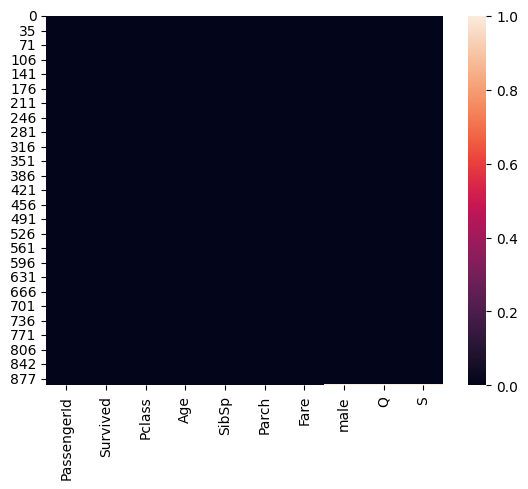

In [294]:
sns.heatmap(df.isnull())

In [295]:
# use of fillna

df=df.fillna(0) # this fills all the missing data in the entire dataset

In [296]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
888,889.0,0.0,3.0,24.0,1.0,2.0,23.4500,1.0,1.0,0.0
889,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0,0.0
890,891.0,0.0,3.0,32.0,0.0,0.0,7.7500,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0,0.0,1.0


<Axes: >

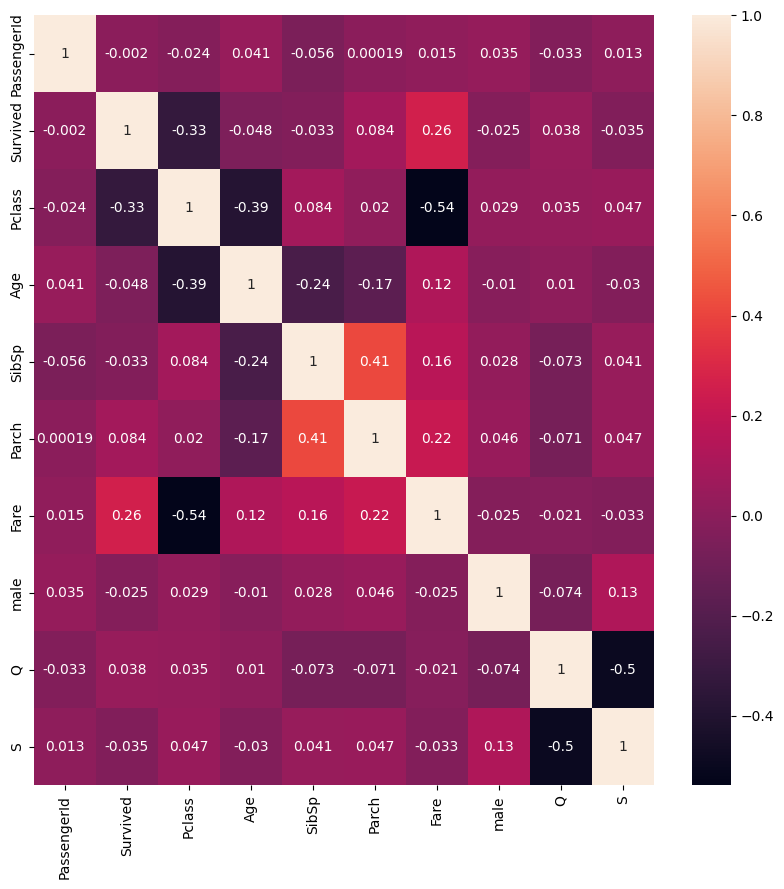

In [297]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Building the Model

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [299]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [300]:
X = df.drop('Survived',axis=1)

In [301]:
y = df['Survived']

In [302]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [303]:
model = LogisticRegression()

In [304]:
model.fit(X_train, y_train)

/home/omo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [305]:
predictions = model.predict(X_test)

In [306]:
from sklearn.metrics import accuracy_score

accuracy_score  = accuracy_score(y_test,predictions)

In [307]:
accuracy_score

0.6940298507462687

In [308]:
from sklearn.metrics import classification_report,confusion_matrix

In [309]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.88      0.77       153
         1.0       0.74      0.44      0.55       115

    accuracy                           0.69       268
   macro avg       0.71      0.66      0.66       268
weighted avg       0.70      0.69      0.68       268



In [310]:
print(confusion_matrix(y_test,predictions))

[[135  18]
 [ 64  51]]


In [311]:
df['Survived'].value_counts()

Survived
0.0    551
1.0    340
Name: count, dtype: int64

## Model Saving

In [312]:
# First Way
import joblib 
joblib.dump(model, 'Titanic_model_LogRegression')
omo_LogisticRegression = joblib.load('Titanic_model_LogRegression')
